In [1]:
import matplotlib.pyplot as plt

import logging

logging.basicConfig(level=logging.INFO)

In [2]:
import drawing
from kirkpatrick import Kirkpatrick, time_tests
from polygons import Point, Polygon, Triangle
from polygons import generate_random_tiling
from polygons import generate_triangle_tiling
from triangulate import triangulate

%load_ext autoreload
%autoreload 2
%autoreload

%matplotlib inline

# Test basic plotting and polygon creation

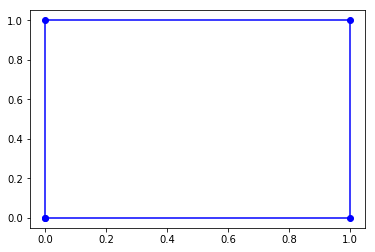

In [3]:
square0 = Polygon([Point(0, 0), Point(1, 0), Point(1, 1), Point(0, 1)])
drawing.plot_polygon(square0, 'bo-')
plt.show()

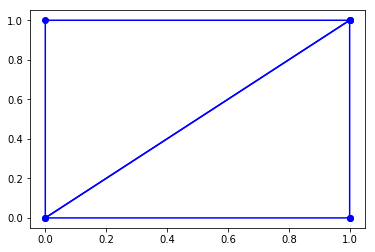

In [4]:
square0_triangles = triangulate(square0)
drawing.plot_polygons(square0_triangles, 'bo-')
plt.show()

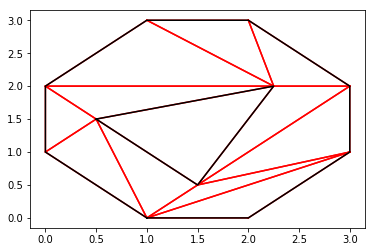

In [5]:
octagon = Polygon([
    Point(1, 0), Point(2, 0), Point(3, 1), Point(3, 2), 
    Point(2, 3), Point(1, 3), Point(0, 2), Point(0, 1)
])
inside_tri = Triangle([
    Point(0.5, 1.5), Point(1.5, 0.5), Point(2.25, 2)
])

# gap_triangles = octagon.triangulate(hole=inside_tri)
gap_triangles = triangulate(octagon, hole=inside_tri)
drawing.plot_polygons(gap_triangles, 'r-')
drawing.plot_polygons([octagon, inside_tri], 'k-')

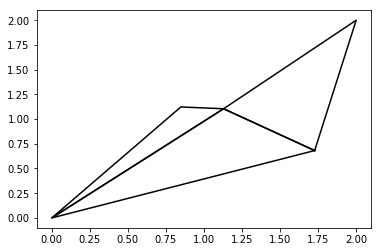

In [6]:
random_polygon = Polygon([
            Point(0.000000, 0.000000), Point(1.727261, 0.681506),
            Point(2.000000, 2.000000), Point(1.128893, 1.104487),
            Point(0.848083, 1.122645)])
random_polygon_triangles = triangulate(random_polygon)
drawing.plot_polygons(random_polygon_triangles, 'k-')

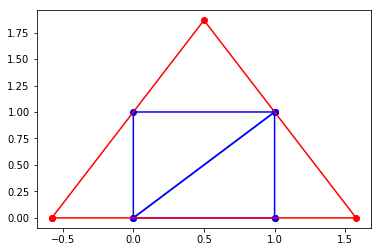

In [7]:
square0_bounding_tri = Triangle.enclosing_triangle(square0)
drawing.plot_polygons(square0_triangles, 'bo-')
drawing.plot_polygon(square0_bounding_tri, 'ro-')

In [8]:
# square1 = Polygon([Point(0, 0), Point(2, 0), Point(2, 2), Point(0, 2)])
# square1_bounding_tri = Triangle.enclosing_triangle(square1)
# gap_triangles = square1_bounding_tri.triangulate(hole=square1)

# drawing.plot_polygons([square1, square1_bounding_tri])

# Test tilings

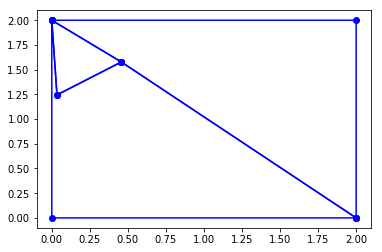

In [9]:
square1 = Polygon([Point(0, 0), Point(2, 0), Point(2, 2), Point(0, 2)])
tiles = generate_random_tiling(square1, 2)
drawing.plot_polygons(tiles, 'bo-')

Point(1.000000, 3.980854)
Point(3.370171, -0.124402)
Point(2.000000, 2.000000)
Point(-1.370171, -0.124402)
Point(0.000000, 2.000000)


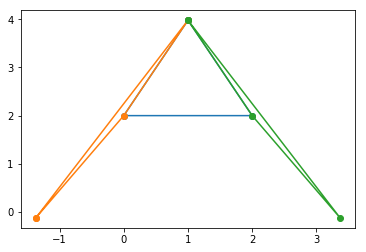

In [10]:
tris = [
    Triangle([Point(1.000000, 3.980854), Point(0.000000, 2.000000), Point(2.000000, 2.000000)]), 
    Triangle([Point(-1.370171, -0.124402), Point(0.000000, 2.000000), Point(1.000000, 3.980854)]), 
    Triangle([Point(1.000000, 3.980854), Point(2.000000, 2.000000), Point(3.370171, -0.124402)])
]

for p in {p for t in tris for p in t.pts}:
    print(p)

# bound = Polygon([Point(1.727261, 0.681506), Point(1.128893, 1.104487), Point(0.000000, 2.000000)])

drawing.plot_polygons(tris, 'o-')
# drawing.plot_polygon(bound, 'ro-')

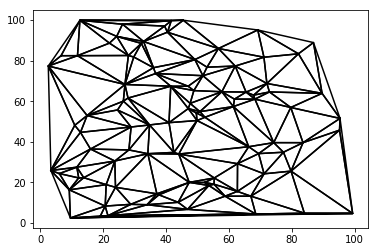

In [11]:
tiles = generate_triangle_tiling(100, 100)
drawing.plot_polygons(tiles, 'k-')

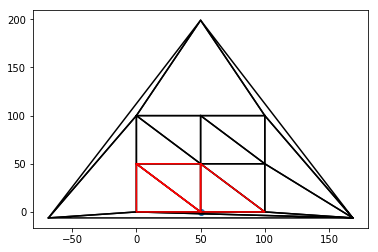

In [12]:
regions = [
    Triangle([Point(0.000000, 50.000000), Point(0.000000, 0.000000), Point(50.000000, 0.000000)]), 
    Triangle([Point(50.000000, 0.000000), Point(50.000000, 50.000000), Point(0.000000, 50.000000)]), 
    Triangle([Point(0.000000, 100.000000), Point(0.000000, 50.000000), Point(50.000000, 50.000000)]), 
    Triangle([Point(50.000000, 50.000000), Point(50.000000, 100.000000), Point(0.000000, 100.000000)]), 
    Triangle([Point(50.000000, 50.000000), Point(50.000000, 0.000000), Point(100.000000, 0.000000)]), 
    Triangle([Point(100.000000, 0.000000), Point(100.000000, 50.000000), Point(50.000000, 50.000000)]), 
    Triangle([Point(50.000000, 100.000000), Point(50.000000, 50.000000), Point(100.000000, 50.000000)]), 
    Triangle([Point(100.000000, 50.000000), Point(100.000000, 100.000000), Point(50.000000, 100.000000)]), 
    
    Triangle([Point(-68.508530, -6.220085), Point(0.000000, 0.000000), Point(0.000000, 100.000000)]), 
    Triangle([Point(0.000000, 0.000000), Point(-68.508530, -6.220085), Point(168.508530, -6.220085)]), 
    Triangle([Point(0.000000, 100.000000), Point(50.000000, 199.042710), Point(-68.508530, -6.220085)]), 
    Triangle([Point(100.000000, 100.000000), Point(50.000000, 199.042710), Point(0.000000, 100.000000)]), 
    Triangle([Point(100.000000, 0.000000), Point(168.508530, -6.220085), Point(100.000000, 50.000000)]), 
    Triangle([Point(168.508530, -6.220085), Point(100.000000, 0.000000), Point(0.000000, 0.000000)]), 
    Triangle([Point(100.000000, 100.000000), Point(100.000000, 50.000000), Point(168.508530, -6.220085)]), 
    Triangle([Point(168.508530, -6.220085), Point(50.000000, 199.042710), Point(100.000000, 100.000000)])
]

affected = [
    Triangle([Point(0.000000, 50.000000), Point(0.000000, 0.000000), Point(50.000000, 0.000000)]), 
    Triangle([Point(50.000000, 0.000000), Point(50.000000, 50.000000), Point(0.000000, 50.000000)]), 
    Triangle([Point(50.000000, 50.000000), Point(50.000000, 0.000000), Point(100.000000, 0.000000)])
]

point = Point(50, 0)

drawing.plot_polygons(regions, 'k-')
drawing.plot_polygons(affected, 'r-')
drawing.plot_point(point)

# Construction locator

Triangle([Point(1.128893, 1.104487), Point(0.848083, 1.122645), Point(0.000000, 0.000000)]) True
Triangle([Point(1.727261, 0.681506), Point(2.000000, 2.000000), Point(1.128893, 1.104487)]) True
Triangle([Point(1.727261, 0.681506), Point(1.128893, 1.104487), Point(0.000000, 0.000000)]) True
Triangle([Point(0.000000, 2.000000), Point(0.000000, 0.000000), Point(0.848083, 1.122645)]) True
Triangle([Point(0.000000, 2.000000), Point(0.848083, 1.122645), Point(1.128893, 1.104487)]) True
Triangle([Point(1.692925, 0.491248), Point(2.000000, 2.000000), Point(1.727261, 0.681506)]) True
Triangle([Point(1.692925, 0.491248), Point(1.727261, 0.681506), Point(0.000000, 0.000000)]) True
Triangle([Point(1.692925, 0.491248), Point(0.000000, 0.000000), Point(2.000000, 0.000000)]) True
Triangle([Point(2.000000, 2.000000), Point(1.692925, 0.491248), Point(2.000000, 0.000000)]) True
Triangle([Point(0.000000, 2.000000), Point(1.128893, 1.104487), Point(2.000000, 2.000000)]) True


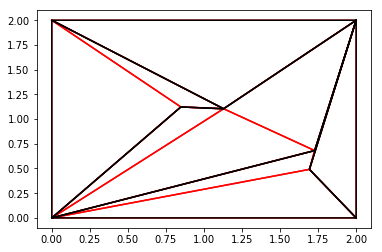

In [13]:
# tiles = [
#     Polygon([
#         Point(8.681595, 3.113523), Point(10.000000, 0.000000), Point(10.000000, 10.000000),
#         Point(1.258842, 6.913277), Point(3.670703, 6.336320), Point(0.000000, 0.000000),
#         Point(8.668625, 6.053702)
#     ]),
#     Polygon([
#         Point(10.000000, 10.000000), Point(0.000000, 10.000000), Point(0.000000, 0.000000),
#         Point(1.258842, 6.913277)
#     ]),
#     Polygon([
#         Point(1.258842, 6.913277), Point(0.000000, 0.000000), Point(3.670703, 6.336320)
#     ]),
#     Polygon([
#         Point(0.000000, 0.000000), Point(8.681595, 3.113523), Point(8.668625, 6.053702)
#     ]),
#     Polygon([
#         Point(0.000000, 0.000000), Point(10.000000, 0.000000), Point(8.681595, 3.113523)
#     ])
# ]

tiles = [
        Polygon([
            Point(0.000000, 0.000000), Point(1.727261, 0.681506),
            Point(2.000000, 2.000000), Point(1.128893, 1.104487),
            Point(0.848083, 1.122645)]),
        Polygon([
            Point(1.128893, 1.104487), Point(0.000000, 2.000000),
            Point(0.000000, 0.000000), Point(0.848083, 1.122645)]),
        Polygon([
            Point(0.000000, 0.000000), Point(2.000000, 0.000000),
            Point(1.692925, 0.491248), Point(2.000000, 2.000000),
            Point(1.727261, 0.681506)]),
        Polygon([
            Point(2.000000, 0.000000), Point(2.000000, 2.000000),
            Point(1.692925, 0.491248)]),
        Polygon([
            Point(2.000000, 2.000000), Point(0.000000, 2.000000),
            Point(1.128893, 1.104487)])
    ]

# drawing.plot_polygons(triangulate(tiles[0]), 'r-')
# drawing.plot_polygon(tiles[0], 'k-')


all_tris = []
for tile in tiles:
    tris = triangulate(tile)
    all_tris += tris
    
for tri in all_tris:
    print(tri, tri.is_ccw())
drawing.plot_polygons(all_tris, 'r-')
drawing.plot_polygons(tiles, 'k-')

In [14]:
tri = Triangle([Point(0, 0), Point(1, 0), Point(0, 1)])
print(tri.ears())

[0, 1, 2]


In [15]:
locator = Kirkpatrick(tiles)
query_point = Point(1, 1)
located_polygon = locator.locate(query_point)

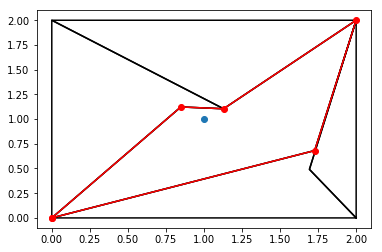

In [16]:
drawing.plot_polygons(tiles, 'k-')
drawing.plot_polygon(located_polygon, 'ro-')
drawing.plot_point(query_point)

# Timing tests

Honestly, you can run these, and it shows almost no increase in runtime, but the amount of time to generate the tilings and the preprocessing takes much longer than the actual algorithm.

In [18]:
data_pts = time_tests(min_pts=100, max_pts=10000, inc=1000)

INFO:root:Running timing tests on point location
INFO:root:Performing tests on 100 points
INFO:root:Performing tests on 1100 points
INFO:root:Performing tests on 2100 points
INFO:root:Performing tests on 3100 points
INFO:root:Performing tests on 4100 points
INFO:root:Performing tests on 5100 points
INFO:root:Performing tests on 6100 points
INFO:root:Performing tests on 7100 points
INFO:root:Performing tests on 8100 points
INFO:root:Performing tests on 9100 points


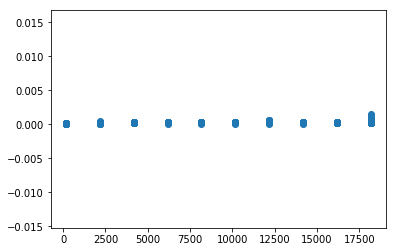

In [19]:
drawing.plot_points(data_pts)